<div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#1E90FF; box-sizing: border-box;">
    <b>📊 Clasificación de Movimientos con Acelerómetro 🚶🏃‍♂️🦘</b>
</div>

<p style="text-align:center; font-size:20px; font-family:Serif; margin-top:15px;">
    Identificación de patrones de movimiento con redes neuronales RNN y LSTM
</p>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
    <div style="text-align:center;">
        <img src="https://cdn-icons-png.flaticon.com/512/58/58177.png" alt="Jump Movement" width="150" height="150" style="border-radius:10px; border: 2px solid #1E90FF;">
        <p style="color:#1E90FF; font-size:18px; font-weight: bold; ">Jump</p>
    </div>
    <div style="text-align:center;">
        <img src="https://cdn-icons-png.flaticon.com/128/7512/7512332.png" alt="Walk Movement" width="150" height="150" style="border-radius:10px; border: 2px solid #1E90FF;">
        <p style="color:#1E90FF; font-size:18px; font-weight: bold; ">Walk</p>
    </div>
    <div style="text-align:center;">
        <img src="https://icons.veryicon.com/png/o/business/classic-icon/running-5.png" alt="Run Movement" width="150" height="150" style="border-radius:10px; border: 2px solid #1E90FF;">
        <p style="color:#1E90FF; font-size:18px; font-weight: bold; ">Run</p>
    </div>
</div>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-top:20px;">
    <b>Modelos Utilizados:</b> Red RNN y LSTM
</p>


---

<h2 style=text-align:center;>Importación de librerias</h2>

In [22]:
# ===========================================
# Librerías de TensorFlow y Keras para modelos y capas de redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import classification_report, confusion_matrix

# ===========================================
# Librerías para manejo de datos y escalado
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ===========================================
# Librerías para visualización
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ===========================================
# Sistema Operativo
import os

<h2 style=text-align:center;>Carga y visualización de datos de acelerómetro</h2>

Este código carga un archivo JSON que contiene datos de movimiento registrados por un acelerómetro para una clase específica (`Jump`). Tras cargar el archivo en un `DataFrame` para facilitar la manipulación de los datos, extrae los valores de aceleración relevantes y los convierte en un array de `NumPy`, optimizando así su manejo para posteriores análisis o entrenamiento en modelos de redes neuronales. Finalmente, el código genera un gráfico de la secuencia de aceleración, permitiendo visualizar cómo fluctúa el movimiento registrado en el tiempo.

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

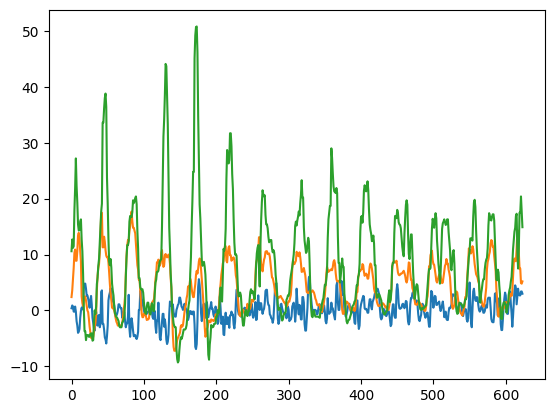

In [2]:
# Carga y visualización de datos de un archivo JSON del movimiento "Jump"
RutaFile = "training/Jump.5b29r0mh.ingestion-5b8bc7d96b-4qd6n.json"

# Lee el archivo JSON en un DataFrame de pandas
dataframe = pd.read_json(RutaFile)

# Imprime todo el contenido del DataFrame para inspección
print(dataframe.to_string())

# Extrae todos los valores numéricos del DataFrame
Valores = dataframe.iloc[:, :].values
print(Valores.shape)  # Imprime la forma del array de valores
print(Valores)        # Imprime los valores extraídos

# Selecciona datos de aceleración de una fila específica y remueve el último elemento
DatosOri1 = Valores[7, 2][0:-1]

# Convierte los datos de aceleración seleccionados en un array de NumPy para manipulación
Datos1 = np.array(DatosOri1)
print(Datos1.shape)  # Imprime la forma del array de datos seleccionados

# Grafica los datos de aceleración para visualizar el movimiento
plt.plot(Datos1)


<h2 style=text-align:center;>Carga y consolidación de datos de acelerómetro</h2>

Este código carga múltiples archivos JSON de una carpeta (`training/`), que contienen datos de acelerómetro para diferentes muestras de movimiento, y consolida todos los datos en una única matriz de `NumPy`. Primero, se listan y ordenan los archivos JSON, luego se itera sobre cada archivo para extraer y convertir los valores de aceleración de interés. Cada conjunto de datos extraído se almacena en la matriz `Datos`, donde las filas representan secuencias individuales de movimiento. Al final, se imprime la forma de `Datos` para confirmar la cantidad total de datos procesados y listos para análisis o modelado.


In [3]:
# Define el directorio que contiene los archivos JSON de entrenamiento
directory = 'training/'

# Lista y ordena los archivos en el directorio
files = os.listdir(directory)
files.sort()

# Calcula la cantidad de archivos y define un array vacío para almacenar todos los datos
cantidadFiles = len(files)
Datos = np.zeros((cantidadFiles * 624, 3))  # Cada archivo contiene 624 muestras y 3 ejes de aceleración

# Itera sobre cada archivo para cargar sus datos y almacenarlos en el array Datos
i = 0
for file in files:
    RutaFile = directory + file  # Ruta completa al archivo actual
    dataframe = pd.read_json(RutaFile)  # Carga el archivo JSON en un DataFrame
    Valores = dataframe.iloc[:, :].values  # Extrae los valores numéricos

    # Obtiene y convierte a array NumPy los datos del eje de aceleración
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)

    # Almacena las primeras 624 muestras del archivo actual en el array Datos
    Datos[i * 624:(i + 1) * 624] = DatosOriNP[0:624]
    i += 1

# Imprime la forma del array Datos para verificar la carga de datos
print(Datos.shape)


(13104, 3)


In [4]:
print(files)

['Jump.5b29r0mh.ingestion-5b8bc7d96b-4qd6n.json', 'Jump.5b29remb.ingestion-5b8bc7d96b-gx8z2.json', 'Jump.5b29s3gp.ingestion-5b8bc7d96b-lcp8w.json', 'Jump.5b29sjlq.ingestion-5b8bc7d96b-4qd6n.json', 'Jump.5b29t48h.ingestion-5b8bc7d96b-gx8z2.json', 'Jump.5b29thvh.ingestion-5b8bc7d96b-lcp8w.json', 'Jump.5b29u2dp.ingestion-5b8bc7d96b-4qd6n.json', 'Run.5b2a0krt.ingestion-5b8bc7d96b-gx8z2.json', 'Run.5b2a1j15.ingestion-5b8bc7d96b-4qd6n.json', 'Run.5b2a2l4q.ingestion-5b8bc7d96b-lcp8w.json', 'Run.5b2a35o7.ingestion-5b8bc7d96b-4qd6n.json', 'Run.5b2a3q1l.ingestion-5b8bc7d96b-gx8z2.json', 'Run.5b2a4m46.ingestion-5b8bc7d96b-lcp8w.json', 'Run.5b2a59jr.ingestion-5b8bc7d96b-4qd6n.json', 'Walk.5b29et94.ingestion-5b8bc7d96b-4qd6n.json', 'Walk.5b29fdci.ingestion-5b8bc7d96b-gx8z2.json', 'Walk.5b29fqu3.ingestion-5b8bc7d96b-lcp8w.json', 'Walk.5b29g8vo.ingestion-5b8bc7d96b-4qd6n.json', 'Walk.5b29glch.ingestion-5b8bc7d96b-gx8z2.json', 'Walk.5b29h1p7.ingestion-5b8bc7d96b-lcp8w.json', 'Walk.5b29hh5p.ingestion-5

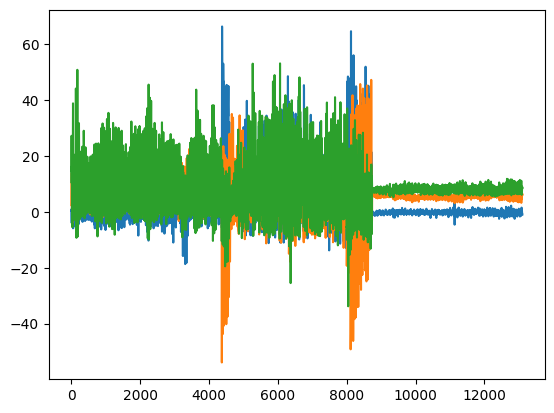

In [5]:
plt.plot(Datos)

<h2 style=text-align:center;>Formateo de datos para entrenamiento</h2>

Este código organiza los datos de acelerómetro en un array `Xtrain` para prepararlos como secuencias estructuradas de entrada para un modelo de aprendizaje. `Xtrain` se inicializa como una matriz tridimensional, donde cada muestra tiene 104 pasos temporales y 3 características (una por cada eje de aceleración: X, Y, Z). Luego, en un bucle, el código asigna bloques de 104 muestras consecutivas de `Datos` a cada dimensión en `Xtrain`, separando cada eje en una columna. Al finalizar, imprime la forma de `Xtrain` para confirmar que los datos están listos en el formato adecuado para el entrenamiento de redes neuronales.


In [6]:
# Inicializa el array Xtrain para almacenar 126 secuencias de 104 pasos temporales y 3 características (ejes de aceleración)
Xtrain = np.zeros((126, 104, 3))

# Itera sobre cada secuencia de entrenamiento para organizar los datos en ejes separados
for i in range(126):
    Xtrain[i, :, 0] = Datos[i * 104:(i + 1) * 104, 0].T  # Eje X de aceleración
    Xtrain[i, :, 1] = Datos[i * 104:(i + 1) * 104, 1].T  # Eje Y de aceleración
    Xtrain[i, :, 2] = Datos[i * 104:(i + 1) * 104, 2].T  # Eje Z de aceleración

# Imprime la forma de Xtrain para confirmar la organización correcta
print(Xtrain.shape)

(126, 104, 3)


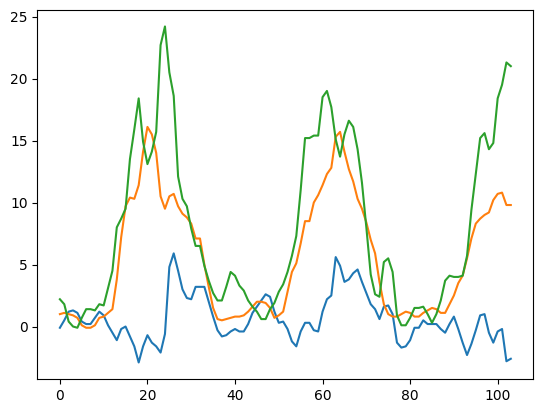

In [7]:
plt.plot(Xtrain[15,:,:])

<h2 style=text-align:center;>Creación de etiquetas para el conjunto de entrenamiento</h2>

Este código genera un array `YtrainIni` que almacena las etiquetas correspondientes a las clases de movimiento para el conjunto de entrenamiento. Se inicializa como un array de ceros, donde cada etiqueta indica un tipo de movimiento: 

- 0 para `Jump`
- 1 para `Run`  
- 2 para `Walk`

A través de bucles, se asignan los valores de etiqueta adecuados a las posiciones correspondientes en `YtrainIni`, asegurando que cada grupo de 42 muestras tenga la etiqueta correcta. Finalmente, se imprime el array de etiquetas para verificar que se ha creado correctamente y corresponde a los datos de entrada.

In [8]:
# Asigna etiquetas a las secuencias de entrenamiento en función de la clase de movimiento

# Inicializa el array YtrainIni para almacenar las etiquetas de 126 secuencias
YtrainIni = np.zeros((126, 1))

# Asigna la etiqueta 0 a las primeras 42 secuencias (movimiento "Jump")
for i in range(42):
    YtrainIni[i] = 0  # Jump

# Asigna la etiqueta 1 a las siguientes 42 secuencias (movimiento "Run")
for i in range(42, 84):
    YtrainIni[i] = 1  # Run

# Asigna la etiqueta 2 a las últimas 42 secuencias (movimiento "Walk")
for i in range(84, 126):
    YtrainIni[i] = 2  # Walk

# Imprime YtrainIni para verificar que las etiquetas se asignaron correctamente
print(YtrainIni)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [9]:
# Convierte las etiquetas de entrenamiento a formato categórico (one-hot encoding)

Ytrain = to_categorical(YtrainIni)  # Convierte las etiquetas en una matriz binaria
print(Ytrain)  # Imprime las etiquetas en formato one-hot encoding para verificación

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

<h2 style=text-align:center;>Definición y visualización del modelo de red neuronal RNN
</h2>

El modelo se construye secuencialmente, comenzando con una capa `SimpleRNN` de 16 unidades, que acepta secuencias de entrada de forma `(104, 3)` (104 pasos temporales y 3 características). Se añaden dos capas adicionales de `SimpleRNN`, con 32 y 64 unidades respectivamente, donde la primera de estas capas retorna secuencias para permitir la propagación hacia la siguiente capa. Finalmente, se incorpora una capa densa con 3 neuronas y una activación `softmax`, que proporciona las probabilidades de pertenencia a cada una de las tres clases de movimiento.

In [10]:
modelo = Sequential()  # Inicializa un modelo secuencial

# Primera capa RNN con 16 unidades, que retorna la secuencia completa para la siguiente capa
modelo.add(SimpleRNN(16, return_sequences=True, input_shape=(104, 3)))

# Segunda capa RNN con 32 unidades, también retorna la secuencia para la siguiente capa
modelo.add(SimpleRNN(32, return_sequences=True))

# Tercera capa RNN con 64 unidades, no retorna la secuencia ya que es la última capa RNN
modelo.add(SimpleRNN(64))

# Capa de salida con 3 neuronas (una para cada clase de movimiento) y activación softmax para clasificación
modelo.add(Dense(3, activation='softmax'))

# Muestra el resumen de la estructura del modelo
modelo.summary()

# Genera un diagrama visual del modelo y guarda la imagen
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

d:\Universidad\6toSemeste\IA\Clasificacion_de_movimientos\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 104, 16)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 104, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,291 (32.39 KB)

 Trainable params: 8,291 (32.39 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [11]:
# Compila el modelo usando la pérdida 'categorical_crossentropy' para clasificación multi-clase
# El optimizador 'adam' se usa para ajustar los pesos de la red, y se mide la precisión ('accuracy')
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento
# Se especifican 50 épocas, sin batch_size explícito (usa el tamaño de batch predeterminado)
# verbose=1 muestra el progreso del entrenamiento en cada época
historia = modelo.fit(Xtrain, Ytrain, epochs=50, batch_size=None, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5472 - loss: 1.0069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7170 - loss: 0.8175
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7172 - loss: 0.6999
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8196 - loss: 0.5692
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8533 - loss: 0.5469
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8324 - loss: 0.4856
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9014 - loss: 0.3735
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9454 - loss: 0.2815
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9350 - loss: 0.2444
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9663 - loss: 0.1981
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9508 - loss: 0.2168
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9686 - loss: 0.1525
E

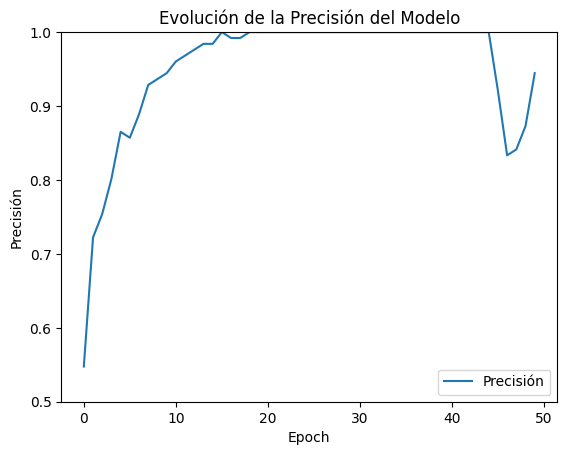

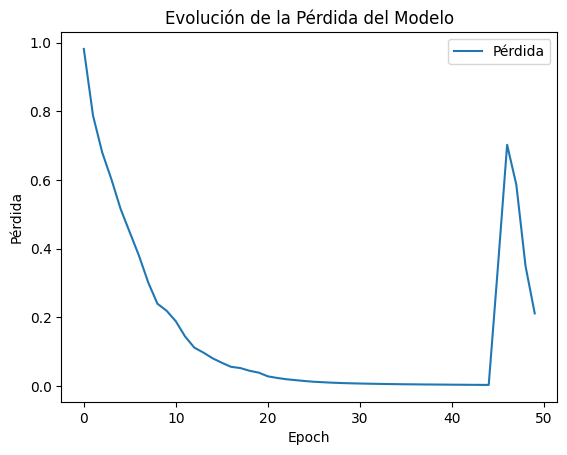

In [12]:
# Evolución de la Precisión del Modelo
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evolución de la Pérdida del Modelo
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Se guarda el modelo entrenado en un archivo H5
modelo.save('modelocelular.h5')

<h2 style=text-align:center;>Carga y visualización de datos de validación</h2>

Este código se encarga de cargar datos de validación desde múltiples archivos JSON ubicados en la carpeta `testing/`. Primero, se listan y ordenan los archivos en el directorio, imprimiendo su nombre para referencia. Luego, se inicializa un array `DatosVal` para almacenar los datos de validación, con el tamaño basado en la cantidad de archivos y el número de muestras a extraer de cada uno. En un bucle, se itera sobre cada archivo, extrayendo los valores de aceleración relevantes y almacenándolos en `DatosVal`. Al final del proceso, se imprime la forma del array `DatosVal` para confirmar que se han cargado correctamente todos los datos de validación. También se visualiza la secuencia completa de datos en un gráfico de línea, lo que permite analizar el comportamiento del movimiento registrado.

['Jump.5b29ujfh.ingestion-5b8bc7d96b-gx8z2.json', 'Jump.5b29v1iv.ingestion-5b8bc7d96b-lcp8w.json', 'Jump.5b29vf8q.ingestion-5b8bc7d96b-4qd6n.json', 'Run.5b2a13mc.ingestion-5b8bc7d96b-lcp8w.json', 'Run.5b2a23in.ingestion-5b8bc7d96b-gx8z2.json', 'Run.5b2a5min.ingestion-5b8bc7d96b-gx8z2.json', 'Walk.5b29huiq.ingestion-5b8bc7d96b-gx8z2.json', 'Walk.5b29id6e.ingestion-5b8bc7d96b-lcp8w.json', 'Walk.5b29iqv0.ingestion-5b8bc7d96b-4qd6n.json']
(5616, 3)


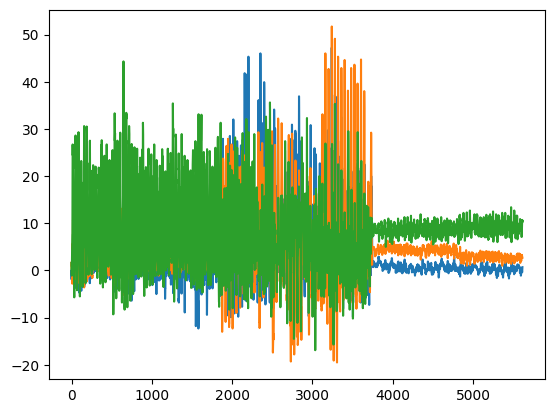

In [13]:
# Procesamiento de Datos de Prueba
directory = 'testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

# Almacena los datos de prueba en un arreglo numpy
DatosVal = np.zeros((cantidadFiles * 624, 3))
i = 0
for file in files:
    RutaFile = directory + file
    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)
    DatosVal[i * 624:(i + 1) * 624] = DatosOriNP[0:624]
    i += 1

print(DatosVal.shape)

# Gráfico de los datos de prueba procesados
plt.plot(DatosVal)


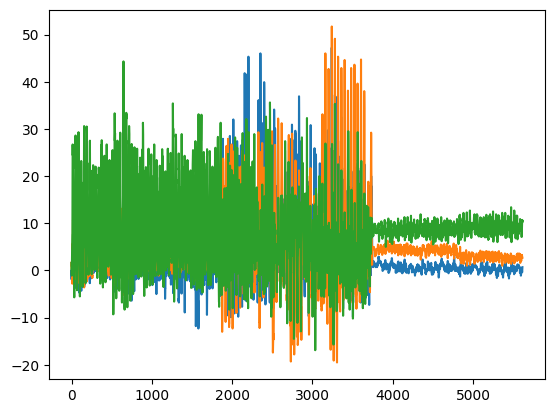

In [14]:

DatosValN=DatosVal
plt.plot(DatosValN)

In [15]:
# Inicialización del arreglo para los datos de validación
XVal = np.zeros((54, 104, 3))

# Proceso para llenar el arreglo XVal con los datos de validación
for i in range(48):
    XVal[i, :, 0] = DatosValN[i * 104:(i + 1) * 104, 0].T
    XVal[i, :, 1] = DatosValN[i * 104:(i + 1) * 104, 1].T
    XVal[i, :, 2] = DatosValN[i * 104:(i + 1) * 104, 2].T

# Imprime la forma del arreglo XVal para verificar su estructura
print(XVal.shape)


(54, 104, 3)


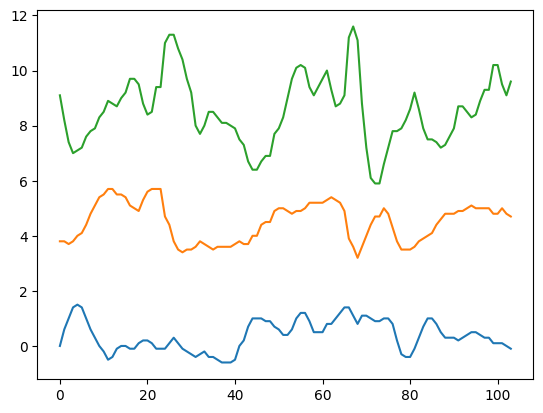

In [16]:
plt.plot(XVal[40,:,:])

In [17]:
# Inicialización del arreglo para las etiquetas de validación
YValIni = np.zeros((54, 1))

# Asignación de las clases correspondientes a cada etiqueta
for i in range(18):
    YValIni[i] = 0  # Jump

for i in range(18, 36):
    YValIni[i] = 1  # Run

for i in range(36, 54):
    YValIni[i] = 2  # Walk

# Imprime el arreglo de etiquetas iniciales
print(YValIni)

# Conversión de las etiquetas a formato categórico para la clasificación
YVal = to_categorical(YValIni)

# Imprime el arreglo de etiquetas categóricas
print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [18]:
modelo.evaluate(XVal, YVal)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7191 - loss: 1.2230


[1.3734450340270996, 0.7037037014961243]

<h2 style=text-align:center;>Predicción y evaluación del modelo</h2>

Se obtiene `ypredic`, que contiene las probabilidades de clase para cada muestra en `XVal`. Luego, se convierten las etiquetas verdaderas (`YVal`) y las predicciones del modelo en clases discretas utilizando `np.argmax`, que selecciona la clase con la mayor probabilidad. 

Se genera un informe de clasificación utilizando `classification_report`, que proporciona métricas como precisión, recall y F1-score para cada clase. Además, se crea una matriz de confusión (`cm`) que compara las etiquetas verdaderas con las predicciones del modelo.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        18
           1       0.73      0.89      0.80        18
           2       1.00      0.56      0.71        18

    accuracy                           0.70        54
   macro avg       0.76      0.70      0.70        54
weighted avg       0.76      0.70      0.70        54

[[12  6  0]
 [ 2 16  0]
 [ 8  0 10]]


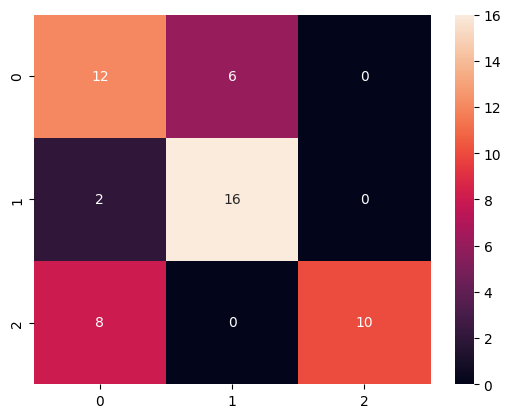

In [19]:
# Realiza la predicción del modelo en los datos de validación
ypredic = modelo.predict(XVal)

# Obtiene las clases verdaderas y las clases predichas
y_test_class = np.argmax(YVal, axis=1)  # Clases verdaderas
y_pred_class = np.argmax(ypredic, axis=1)  # Clases predichas

# Imprime el informe de clasificación que incluye precisión, recall y f1-score
print(classification_report(y_test_class, y_pred_class))

# Calcula la matriz de confusión para evaluar el desempeño del modelo
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# Crea un DataFrame de la matriz de confusión para su visualización
df_cm = pd.DataFrame(cm)

# Genera un mapa de calor para visualizar la matriz de confusión
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")


<h2 style=text-align:center;>Definición y visualización del modelo LSTM</h2>

La arquitectura se construye de manera secuencial, comenzando con una capa LSTM de 16 unidades, que acepta secuencias de entrada con forma `(104, 3)`, donde 104 representa los pasos temporales y 3 las características (ejes de aceleración). A continuación, se añaden dos capas LSTM adicionales con 32 y 64 unidades, respectivamente; la primera de estas capas devuelve secuencias para permitir la transmisión de datos a la siguiente capa. Finalmente, se incorpora una capa densa con 3 neuronas y activación `softmax`, que genera las probabilidades para cada una de las tres clases de movimiento.

In [23]:
# Definición del modelo LSTM para la clasificación de movimientos
modelo_lstm = Sequential()  # Inicializa un modelo secuencial

# Añade la primera capa LSTM con 16 unidades y devuelve las secuencias
modelo_lstm.add(LSTM(16, return_sequences=True, input_shape=(104, 3)))

# Añade una segunda capa LSTM con 32 unidades
modelo_lstm.add(LSTM(32, return_sequences=True))

# Añade una tercera capa LSTM con 64 unidades
modelo_lstm.add(LSTM(64))

# Añade una capa densa de salida con 3 unidades (una por cada clase) y activación softmax
modelo_lstm.add(Dense(3, activation='softmax'))

# Muestra un resumen del modelo, incluyendo el número de parámetros
modelo_lstm.summary()

# Guarda una visualización del modelo en un archivo PNG, mostrando las formas y nombres de las capas
keras.utils.plot_model(modelo_lstm, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)


d:\Universidad\6toSemeste\IA\Clasificacion_de_movimientos\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 104, 16)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 104, 32)        │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,579 (127.26 KB)

 Trainable params: 32,579 (127.26 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [24]:
modelo_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo_lstm.fit(Xtrain,Ytrain, epochs=50,batch_size=None,verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.3295 - loss: 1.1038
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6101 - loss: 0.9952
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7578 - loss: 0.8681
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7654 - loss: 0.7185
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8836 - loss: 0.4716
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9100 - loss: 0.3101
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9581 - loss: 0.1621
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9571 - loss: 0.1526
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9686 - loss: 0.1212
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9801 - loss: 0.0666
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9801 - loss: 0.0722
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9947 - loss: 0.0438
E

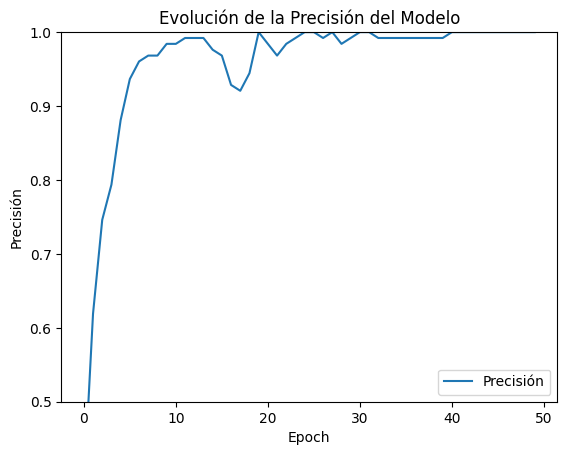

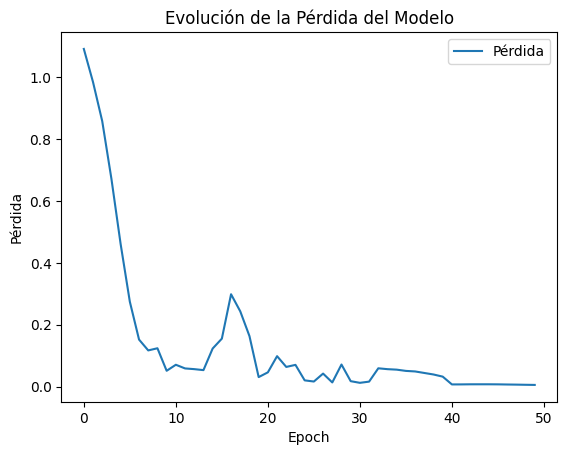

In [25]:
# Evolución de la Precisión del Modelo
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evolución de la Pérdida del Modelo
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [26]:
modelo_lstm.evaluate(XVal, YVal)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8889 - loss: 0.6439 


[0.9631249308586121, 0.8333333134651184]

<h2 style=text-align:center;>Predicción y evaluación del modelo</h2>

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       1.00      1.00      1.00        18
           2       1.00      0.50      0.67        18

    accuracy                           0.83        54
   macro avg       0.89      0.83      0.82        54
weighted avg       0.89      0.83      0.82        54

[[18  0  0]
 [ 0 18  0]
 [ 9  0  9]]


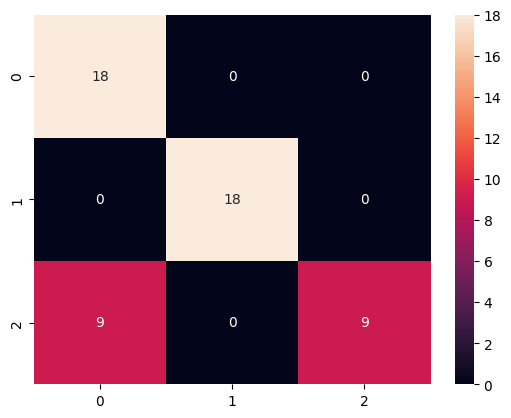

In [27]:
# Realizar predicciones con el modelo LSTM utilizando los datos de validación
ypredic = modelo_lstm.predict(XVal)  # Obtener las predicciones del modelo

# Obtener las clases verdaderas y las predicciones como enteros
y_test_class = np.argmax(YVal, axis=1)  # Convertir las etiquetas verdaderas en clases
y_pred_class = np.argmax(ypredic, axis=1)  # Convertir las predicciones en clases

# Imprimir el reporte de clasificación que muestra precisión, recall y F1-score
print(classification_report(y_test_class, y_pred_class))

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test_class, y_pred_class)  # Calcular la matriz de confusión
print(cm)  # Imprimir la matriz de confusión

# Crear un DataFrame a partir de la matriz de confusión para visualización
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")  # Graficar la matriz de confusión con anotaciones
